<a href="https://colab.research.google.com/github/kieunseo/Textmining/blob/main/Review/%EA%B5%AC%EA%B8%80%ED%94%8C%EB%A0%88%EC%9D%B4%EC%8A%A4%ED%86%A0%EC%96%B4_%EB%B0%B0%EB%8B%AC%EC%95%B1_%EB%A6%AC%EB%B7%B0%20_%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 구글플레이스토어 리뷰 크롤링

In [ ]:
# google_play_scraper 라이브러리 설치: 구글 플레이스토어에서 데이터를 쉽게 가져올 수 있음
!pip install google_play_scraper

In [ ]:
from google_play_scraper import Sort, reviews_all
from datetime import datetime
import pandas as pd



lang = 'ko'

cont = 'kr'


result = reviews_all(
    'com.sampleapp', #id뒤 구글플레이스토어 배달의민족 링크
    sleep_milliseconds=3000,
    lang=lang,
    country=cont,
    sort=Sort.MOST_RELEVANT, #관련성 높은 순
    #filter_score_with=5 #평점이 5점인 리뷰만 크롤링 가능
)



start_date = datetime(2020,1,1)
end_date = datetime(2024,4,2)


reviews_data = []


for item in result:

    if start_date <= item['at'] <= end_date:
        review = {
            'date': item['at'],
            'userName': item['userName'],
            'score': item['score'],
            'content': item['content']
        }
        reviews_data.append(review)


df_reviews = pd.DataFrame(reviews_data)
print(len(df_reviews))


csv_filename = '배달의민족reviews.csv'

df_reviews.to_csv(csv_filename, index=False, encoding='utf-8-sig')

print(f'Reviews saved to {csv_filename}')


155
Reviews saved to 배달의민족reviews.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 24.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from konlpy.tag import Okt
import seaborn as sns
import matplotlib.pyplot as plt
okt = Okt()

#☑️ 배달의민족

In [ ]:
baedalminjok_df = pd.read_csv('/content/drive/MyDrive/배달의민족reviews.csv')

In [ ]:
baedalminjok_df.head(10)

,date,userName,score,content
0,2024-03-30 02:46:12,이유빈,1,아무리 생각해봐도 배달의민족 어플리케이션 UI관련 부서 문제있어보이네요 기존에 주문...
1,2024-03-22 05:21:57,박지은,1,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
2,2024-03-16 16:23:10,환바,3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
3,2024-03-26 11:22:36,김태현,4,"주문할 때 배달방식(알뜰, 한집) 선택 없어주셨으면 좋겠습니다. 너무 불편하고, 이..."
4,2024-02-03 05:09:08,커피콩,3,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
5,2024-02-01 11:15:35,xojeexo,3,B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
6,2024-01-14 09:03:15,g s,1,수저포크x 버튼 기본으로 활성화 되어있는거 환경 보호한다고 해놓은거 압니다. 그런데...
7,2024-03-16 03:46:03,김아름,1,개선이되고 업데이트가 된다는건 불편했던 사항들을 반영하는것 아닌가요? 오히려 더 불...
8,2024-03-09 12:14:14,CSLCS,1,저는 알뜰이나 한집배달이용을 원치않는데 가게검색시에는 가게배달은 선택할수가없네요. ...
9,2024-01-23 17:56:43,달달디,1,왜 배달이 사라지고 자체배달이 생긴걸까요? 이제 알뜰이랑 한집배달만 남은건가요? 일...


In [ ]:
len(baedalminjok_df)

155

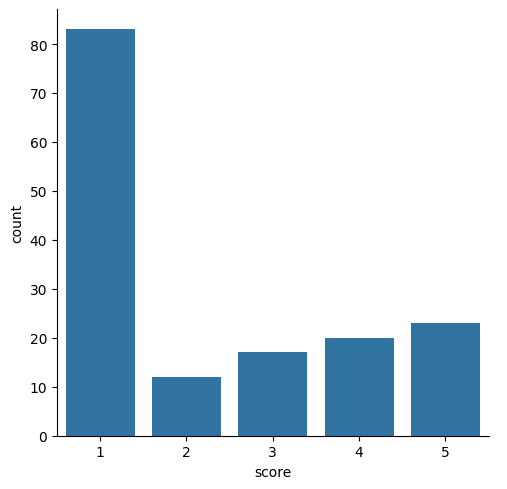

In [ ]:
sns.catplot(x='score', kind='count', data=baedalminjok_df) #리뷰 점수 확인

In [ ]:
baedalminjok_df['score'].value_counts()

score
1    83
5    23
4    20
3    17
2    12
Name: count, dtype: int64

In [ ]:
# text = 자를 문자열
# kind = 종류(명사, 형용사...)
def tokenizer(text, kind):
    morph = okt.pos(text)
    words = []
    for word, tag in morph:
        if tag in [kind]:
            if len(word) > 1:
                words.append(word)
    return words

In [ ]:
text = "동해물과 백두산이 미르고 닳도록 좋아좋아"
Noun = "Adjective"
tokenizer(text, Noun)

['좋아', '좋아']

In [ ]:
okt.pos("동해물과 백두산이 미르고 닳도록 좋아좋아")

[('동', 'Modifier'),
 ('해물', 'Noun'),
 ('과', 'Josa'),
 ('백두산', 'Noun'),
 ('이', 'Josa'),
 ('미르', 'Noun'),
 ('고', 'Josa'),
 ('닳도록', 'Verb'),
 ('좋아', 'Adjective'),
 ('좋아', 'Adjective')]

In [ ]:
baedalminjok_df['Nouns'] = baedalminjok_df['content'].apply(tokenizer, kind = "Noun")

In [ ]:
baedalminjok_df['Adjectives'] = baedalminjok_df['content'].apply(tokenizer, kind = "Adjective")

In [ ]:
baedalminjok_df

,date,userName,score,content,Nouns,Adjectives
0,2024-03-30 02:46:12,이유빈,1,아무리 생각해봐도 배달의민족 어플리케이션 UI관련 부서 문제있어보이네요 기존에 주문...,"[생각, 배달, 민족, 어플리케이션, 관련, 부서, 문제, 기존, 한번, 포기, 각...","[있어, 있던, 낮은, 없고, 편하게, 있도록, 같은데, 안좋은, 편하게하고, 같은데]"
1,2024-03-22 05:21:57,박지은,1,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...,"[업데이트, 사용, 점점, 클릭, 한번, 결제, 저쪽, 구석, 마치, 배달, 유도,...","[불편하게, 번거롭게, 쓸데없는]"
2,2024-03-16 16:23:10,환바,3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...","[배달, 민족, 자체, 식사, 리뷰, 평점, 자체, 클린, 식당, 입장, 업주, 입...","[만족하나, 같습니다, 높은, 인한, 기대하려, 없는, 정확한, 어렵다는, 즐거운,..."
3,2024-03-26 11:22:36,김태현,4,"주문할 때 배달방식(알뜰, 한집) 선택 없어주셨으면 좋겠습니다. 너무 불편하고, 이...","[주문, 배달, 방식, 알뜰, 선택, 이용, 현금, 결제, 현금, 결제, 다른, 현...","[없어주셨으면, 좋겠습니다, 불편하고, 없겠습니다, 상당히, 불편합니다, 계실, 웬..."
4,2024-02-03 05:09:08,커피콩,3,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...,"[장바구니, 마트, 여러가지, 크롤, 살짝, 대각선, 배달, 포장, 용량, 좌우, ...","[불편합니다, 아닌, 예민해서, 짜증나더라고요, 없는듯, 입니다]"
...,...,...,...,...,...,...
150,2024-01-06 13:16:26,김창현,1,배빈1으로 1시간 넘게 음식을 못받았습니다. 고객센터도 연락 잘 안되고 잘 안되는 ...,"[배빈, 음식, 고객, 센터, 연락, 타이밍, 이용, 매점, 우리, 음식, 우리, ...","[안되고, 안되는, 없다, 전화해서, 아까운, 입니다, 이럴, 있을, 없던]"
151,2024-01-16 20:24:03,양혜원,1,새로운 계정으로 로그인됬다는 메일+앱알람 받아서 고객센터 문의했는데 똑같은말만 반복...,"[계정, 로그인, 메일, 알람, 고객, 센터, 문의, 반복, 처음, 계정, 계속, ...","[새로운, 똑같은, 그럴수있다, 없다, 이럴꺼면, 새로운, 없다, 없네요, 어이없어서]"
152,2024-03-23 12:51:29,온새미로,5,몇 달 전부터 잘 써오던 배민 유저 입니다. 다른 건 다 좋은데요 다른 식당하고 음...,"[배민, 유저, 다른, 다른, 식당, 음식, 기능, 하나, 하나, 구매, 조금, 해...","[입니다, 좋은데, 있었으면, 좋겠습니다, 번거롭습니다, 좋을, 같아요]"
153,2024-03-23 02:02:10,박은진,1,한집배달 배차가 너무 안됨 한집배달 선택하는 이유가 배달을 빨리 받고 싶어서인데 라...,"[배달, 배차, 배달, 선택, 이유, 배달, 어서, 라이더, 배차, 배달, 지불, ...","[안됨, 비싼, 이런, 많다고, 연결하라고, 전화하면, 많다고, 전화하라면서]"


In [ ]:
# 불용어 정의
stop_words = ['입니다', '같습니다', '있는', '있습니다', '같아요', '같은']

def remove_stopwords(lst):
    result = []
    for word in lst:
        if word not in stop_words:
            result.append(word)
    return result

# 불용어 제거 함수를 적용
baedalminjok_df['Nouns'] = baedalminjok_df['Nouns'].apply(remove_stopwords)
baedalminjok_df['Adjectives'] = baedalminjok_df['Adjectives'].apply(remove_stopwords)

In [ ]:
baedalminjok_df

,date,userName,score,content,Nouns,Adjectives
0,2024-03-30 02:46:12,이유빈,1,아무리 생각해봐도 배달의민족 어플리케이션 UI관련 부서 문제있어보이네요 기존에 주문...,"[생각, 배달, 민족, 어플리케이션, 관련, 부서, 문제, 기존, 한번, 포기, 각...","[있어, 있던, 낮은, 없고, 편하게, 있도록, 같은데, 안좋은, 편하게하고, 같은데]"
1,2024-03-22 05:21:57,박지은,1,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...,"[업데이트, 사용, 점점, 클릭, 한번, 결제, 저쪽, 구석, 마치, 배달, 유도,...","[불편하게, 번거롭게, 쓸데없는]"
2,2024-03-16 16:23:10,환바,3,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...","[배달, 민족, 자체, 식사, 리뷰, 평점, 자체, 클린, 식당, 입장, 업주, 입...","[만족하나, 높은, 인한, 기대하려, 없는, 정확한, 어렵다는, 즐거운, 기대하나,..."
3,2024-03-26 11:22:36,김태현,4,"주문할 때 배달방식(알뜰, 한집) 선택 없어주셨으면 좋겠습니다. 너무 불편하고, 이...","[주문, 배달, 방식, 알뜰, 선택, 이용, 현금, 결제, 현금, 결제, 다른, 현...","[없어주셨으면, 좋겠습니다, 불편하고, 없겠습니다, 상당히, 불편합니다, 계실, 웬..."
4,2024-02-03 05:09:08,커피콩,3,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...,"[장바구니, 마트, 여러가지, 크롤, 살짝, 대각선, 배달, 포장, 용량, 좌우, ...","[불편합니다, 아닌, 예민해서, 짜증나더라고요, 없는듯]"
...,...,...,...,...,...,...
150,2024-01-06 13:16:26,김창현,1,배빈1으로 1시간 넘게 음식을 못받았습니다. 고객센터도 연락 잘 안되고 잘 안되는 ...,"[배빈, 음식, 고객, 센터, 연락, 타이밍, 이용, 매점, 우리, 음식, 우리, ...","[안되고, 안되는, 없다, 전화해서, 아까운, 이럴, 있을, 없던]"
151,2024-01-16 20:24:03,양혜원,1,새로운 계정으로 로그인됬다는 메일+앱알람 받아서 고객센터 문의했는데 똑같은말만 반복...,"[계정, 로그인, 메일, 알람, 고객, 센터, 문의, 반복, 처음, 계정, 계속, ...","[새로운, 똑같은, 그럴수있다, 없다, 이럴꺼면, 새로운, 없다, 없네요, 어이없어서]"
152,2024-03-23 12:51:29,온새미로,5,몇 달 전부터 잘 써오던 배민 유저 입니다. 다른 건 다 좋은데요 다른 식당하고 음...,"[배민, 유저, 다른, 다른, 식당, 음식, 기능, 하나, 하나, 구매, 조금, 해...","[좋은데, 있었으면, 좋겠습니다, 번거롭습니다, 좋을]"
153,2024-03-23 02:02:10,박은진,1,한집배달 배차가 너무 안됨 한집배달 선택하는 이유가 배달을 빨리 받고 싶어서인데 라...,"[배달, 배차, 배달, 선택, 이유, 배달, 어서, 라이더, 배차, 배달, 지불, ...","[안됨, 비싼, 이런, 많다고, 연결하라고, 전화하면, 많다고, 전화하라면서]"


##1점 리뷰

In [ ]:
baedalminjok1_df = baedalminjok_df[baedalminjok_df['score'] == 1]

In [ ]:
import matplotlib.font_manager as fm
fontpath='/content/BMHANNAPro.ttf'
font=fm.FontProperties(fname=fontpath,size=10)

###명사

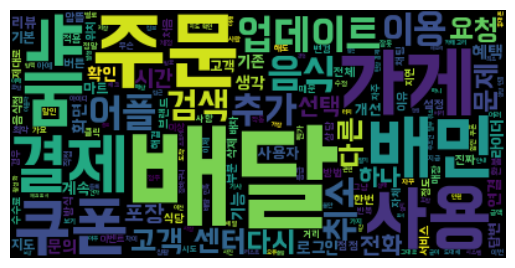

In [ ]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Nouns = baedalminjok1_df['Nouns'].tolist()
Nouns_str = ''
for lst in Nouns:
    for word in lst:
        Nouns_str += (word + ' ')
Nouns_str


wordcloud = WordCloud(font_path=fontpath).generate(Nouns_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

###형용사

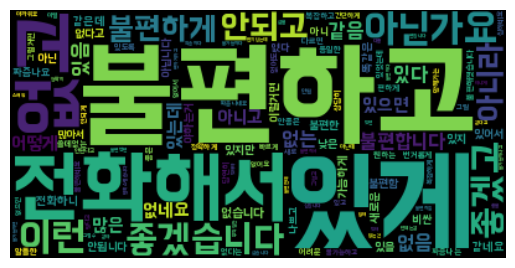

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Adjectives = baedalminjok1_df['Adjectives'].tolist()
Adjectives_str = ''
for lst in Adjectives:
    for word in lst:
        Adjectives_str += (word + ' ')
Adjectives_str


wordcloud = WordCloud(font_path=fontpath).generate(Adjectives_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

##5점 리뷰

In [ ]:
baedalminjok5_df = baedalminjok_df[baedalminjok_df['score'] == 5]

###명사

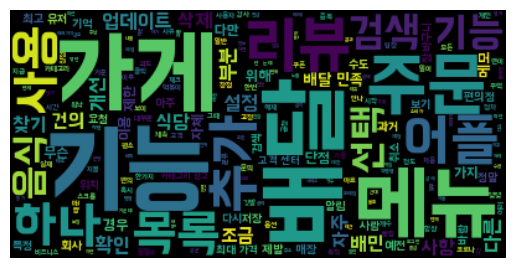

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Nouns = baedalminjok5_df['Nouns'].tolist()
Nouns_str = ''
for lst in Nouns:
    for word in lst:
        Nouns_str += (word + ' ')
Nouns_str


wordcloud = WordCloud(font_path=fontpath).generate(Nouns_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

###형용사

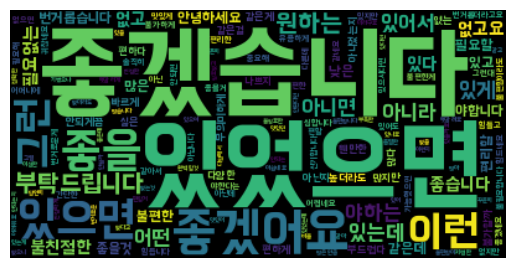

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Adjectives = baedalminjok5_df['Adjectives'].tolist()
Adjectives_str = ''
for lst in Adjectives:
    for word in lst:
        Adjectives_str += (word + ' ')
Adjectives_str


wordcloud = WordCloud(font_path=fontpath).generate(Adjectives_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

#☑️ 쿠팡이츠

In [ ]:
coupang_df = pd.read_csv('/content/쿠팡이츠reviews.csv')

In [ ]:
coupang_df.head(5)

,date,userName,score,content
0,2024-03-26 04:30:13,감귤 (weekend),5,메뉴를 엄청 세분화해놓은 매장에서 메뉴를 스크롤하기가 (타 어플과 비교해서) 조금 ...
1,2024-03-11 15:06:16,김종근,2,갑자기 네트워크 연결이 잘 안된다고 앱이 너무 느려졌음 며칠 째 개선이 안됨 수정 ...
2,2024-02-07 12:34:03,서수연,4,"평소에는 주문이 잘되고 배달하시는 분 위치도 잘 파악이 되는건 큰 장점중하나지만, ..."
3,2024-01-20 10:06:00,Sunny,5,목록엔 영업중인걸로 떠서 막상 들어가서 메뉴선택하면 준비중이라고 나와서 불편해요. ...
4,2024-01-14 04:59:34,정재헌,4,와우할인이나 세이브배달은 만족스럽습니다. 하지만 저같은 경우 각각 다른 매장에서 콜...


In [ ]:
len(coupang_df)

194

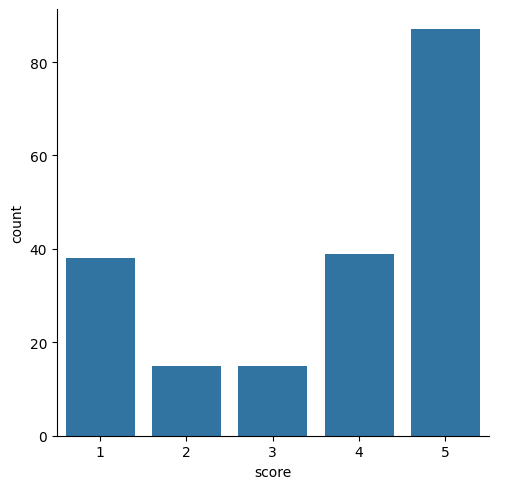

In [ ]:
sns.catplot(x='score', kind='count', data=coupang_df)

In [ ]:
coupang_df['score'].value_counts()

score
5    87
4    39
1    38
2    15
3    15
Name: count, dtype: int64

In [ ]:
def tokenizer(text, kind):
    morph = okt.pos(text)
    words = []
    for word, tag in morph:
        if tag in [kind]:
            if len(word) > 1:
                words.append(word)
    return words

In [ ]:
coupang_df['Nouns'] = coupang_df['content'].apply(tokenizer, kind = "Noun")

In [ ]:
coupang_df['Adjectives'] = coupang_df['content'].apply(tokenizer, kind = "Adjective")

In [ ]:
coupang_df

,date,userName,score,content,Nouns,Adjectives
0,2024-03-26 04:30:13,감귤 (weekend),5,메뉴를 엄청 세분화해놓은 매장에서 메뉴를 스크롤하기가 (타 어플과 비교해서) 조금 ...,"[메뉴, 세분, 매장, 메뉴, 크롤, 어플, 비교, 조금, 할인, 배달, 준수, 등...","[화해놓은, 번거로, 같아, 가능한, 망하길]"
1,2024-03-11 15:06:16,김종근,2,갑자기 네트워크 연결이 잘 안된다고 앱이 너무 느려졌음 며칠 째 개선이 안됨 수정 ...,"[갑자기, 네트워크, 연결, 며칠, 개선, 수정, 와이파이, 인터넷, 네트워크, 연...","[안된다고, 느려졌음, 안됨, 없음, 없음, 없네요]"
2,2024-02-07 12:34:03,서수연,4,"평소에는 주문이 잘되고 배달하시는 분 위치도 잘 파악이 되는건 큰 장점중하나지만, ...","[평소, 주문, 배달, 위치, 파악, 장점, 하나, 오거, 배달, 취소, 쿠팡, 고...","[안되서, 전화해, 안되서, 힘들, 있네요, 자유롭게, 있으면, 좋을것, 같습니다]"
3,2024-01-20 10:06:00,Sunny,5,목록엔 영업중인걸로 떠서 막상 들어가서 메뉴선택하면 준비중이라고 나와서 불편해요. ...,"[목록, 영업, 인걸, 막상, 메뉴, 선택, 준비, 검색, 메뉴얼, 적응, 와우, ...","[불편해요, 안되서, 불편하지만, 있어요, 당연한]"
4,2024-01-14 04:59:34,정재헌,4,와우할인이나 세이브배달은 만족스럽습니다. 하지만 저같은 경우 각각 다른 매장에서 콜...,"[와우, 할인, 세이브, 배달, 경우, 각각, 다른, 매장, 콜라, 추가, 경우, ...","[만족스럽습니다, 같은, 안되서, 전화하여, 귀찮아, 이런, 불편합니다]"
...,...,...,...,...,...,...
189,2024-01-25 11:26:24,양미경,5,할인 받고 배달음식 먹을 수 있어서 좋고 배달로드뷰도 볼 수 있어 아주 좋아요,"[할인, 배달, 음식, 배달, 로드, 아주]","[있어서, 좋고, 있어, 좋아요]"
190,2024-01-12 16:11:51,Kim Rachel,5,배달현황까지 제공되어서 좋구요 와우회원은 여러모로 할인혜택을 주니 잘 사용하게 됩니...,"[배달, 현황, 제공, 와우, 회원, 모로, 할인, 혜택, 주니, 사용]",[좋구요]
191,2024-03-10 14:10:43,이기민,5,다른 앱보다 저렴하고 배달비도 저렴한 듯 해요...요즘은 이걸 더 많이 쓰는 편입니다,"[다른, 배달, 비도, 요즘, 편입]","[저렴하고, 저렴한]"
192,2024-02-03 10:52:07,한순경,5,요기요 회원하다~ 요새는 여기에서 자주주문^^ 일간 배달이 빠르고 단점은 ~문자를 ...,"[요기, 회원, 요새, 여기, 자주, 주문, 일간, 배달, 단점, 문자, 배달]",[빠르고]


In [ ]:
# 불용어 정의
stop_words = ['입니다', '같습니다', '있는', '있습니다', '같아요', '같은']

def remove_stopwords(lst):
    result = []
    for word in lst:
        if word not in stop_words:
            result.append(word)
    return result

# 불용어 제거 함수를 'content' 열에 적용
coupang_df['Nouns'] = coupang_df['Nouns'].apply(remove_stopwords)
coupang_df['Adjectives'] = coupang_df['Adjectives'].apply(remove_stopwords)


##1점 리뷰

In [ ]:
coupang1_df = coupang_df[coupang_df['score'] == 1]

###명사

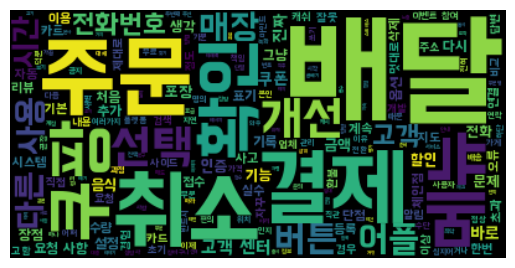

In [ ]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Nouns = coupang1_df['Nouns'].tolist()
Nouns_str = ''
for lst in Nouns:
    for word in lst:
        Nouns_str += (word + ' ')
Nouns_str


wordcloud = WordCloud(font_path=fontpath).generate(Nouns_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

###형용사

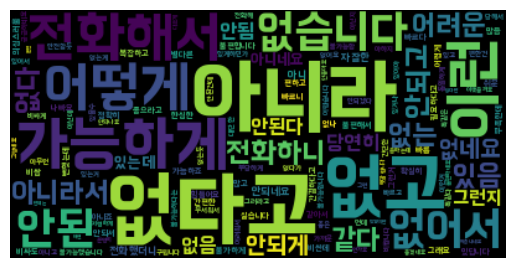

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Adjectives = coupang1_df['Adjectives'].tolist()
Adjectives_str = ''
for lst in Adjectives:
    for word in lst:
        Adjectives_str += (word + ' ')
Adjectives_str


wordcloud = WordCloud(font_path=fontpath).generate(Adjectives_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

##5점 리뷰

###명사

In [ ]:
coupang5_df = coupang_df[coupang_df['score'] == 5]

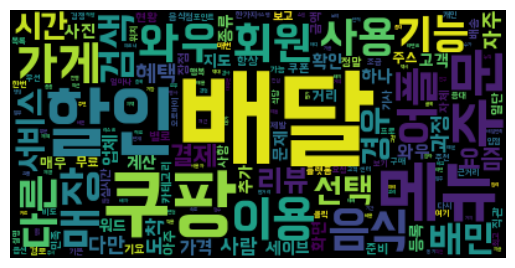

In [ ]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Nouns = coupang5_df['Nouns'].tolist()
Nouns_str = ''
for lst in Nouns:
    for word in lst:
        Nouns_str += (word + ' ')
Nouns_str


wordcloud = WordCloud(font_path=fontpath).generate(Nouns_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

###형용사

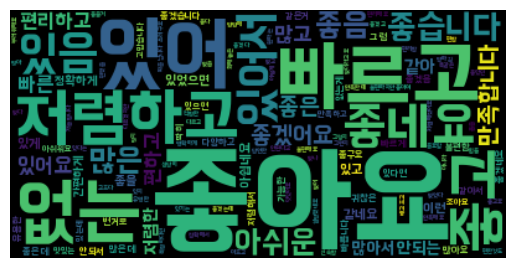

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Adjectives = coupang5_df['Adjectives'].tolist()
Adjectives_str = ''
for lst in Adjectives:
    for word in lst:
        Adjectives_str += (word + ' ')
Adjectives_str


wordcloud = WordCloud(font_path=fontpath).generate(Adjectives_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

#☑️ 요기요

In [ ]:
yogiyo_df = pd.read_csv('/content/요기요reviews.csv')

In [ ]:
yogiyo_df.head(5)

,date,userName,score,content
0,2024-02-29 06:55:22,Ambience,1,요마트 출시 때도 비슷한 리뷰 달았었는데요. 이벤트페이지에서 스크롤하다 옆페이지로 ...
1,2024-02-20 01:32:32,하율무 HAYULMU,1,이번 업데이트는 사용자의 UI UX를 무시한 처사임. 메뉴 아이콘 간격이 좁아지며 ...
2,2024-02-16 03:59:43,자뭉,2,몇년간 불만 없이 잘 썻는데 이번 ui업뎃하고 불편한점이 많아져서 요기패스 구독 취...
3,2024-03-11 12:31:09,ykann,5,원래 리뷰는 불만인 사람들만 달지 별 불만없는 사람들은 안달기 때문에... 당연히 ...
4,2024-02-18 09:39:22,protection V,1,요편의점(gs) 주변 지점 변경하면서 유용하게 이용중이었으나 갑자기 이번 후퇴뎃이후...


In [ ]:
len(yogiyo_df)

195

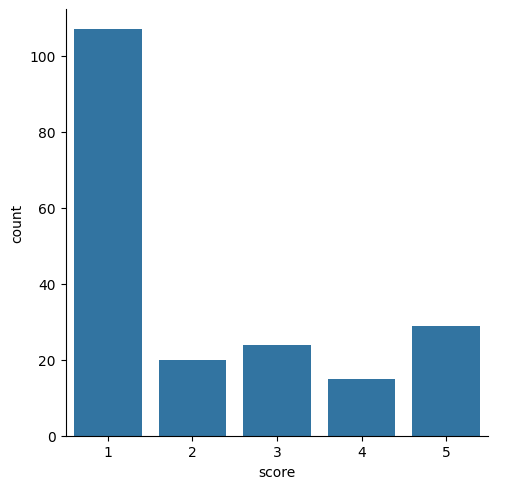

In [ ]:
sns.catplot(x='score', kind='count', data=yogiyo_df)

In [ ]:
yogiyo_df['score'].value_counts()

score
1    107
5     29
3     24
2     20
4     15
Name: count, dtype: int64

In [ ]:
def tokenizer(text, kind):
    morph = okt.pos(text)
    words = []
    for word, tag in morph:
        if tag in [kind]:
            if len(word) > 1:
                words.append(word)
    return words

In [ ]:
yogiyo_df['Nouns'] = yogiyo_df['content'].apply(tokenizer, kind = "Noun")

In [ ]:
yogiyo_df['Adjectives'] = yogiyo_df['content'].apply(tokenizer, kind = "Adjective")

In [ ]:
yogiyo_df

,date,userName,score,content,Nouns,Adjectives
0,2024-02-29 06:55:22,Ambience,1,요마트 출시 때도 비슷한 리뷰 달았었는데요. 이벤트페이지에서 스크롤하다 옆페이지로 ...,"[마트, 출시, 리뷰, 이벤트, 페이지, 크롤, 페이지, 일쑤, 사람, 스크롤할, ...","[비슷한, 입니다, 어떤, 불편하다, 아닙니다]"
1,2024-02-20 01:32:32,하율무 HAYULMU,1,이번 업데이트는 사용자의 UI UX를 무시한 처사임. 메뉴 아이콘 간격이 좁아지며 ...,"[이번, 업데이트, 사용자, 무시, 처사, 메뉴, 아이콘, 간격, 아이콘, 터치, ...","[좁아지며, 중요한, 있었던, 상관없는, 필요했다고]"
2,2024-02-16 03:59:43,자뭉,2,몇년간 불만 없이 잘 썻는데 이번 ui업뎃하고 불편한점이 많아져서 요기패스 구독 취...,"[불만, 썻는데, 이번, 업뎃, 요기, 패스, 구독, 취소, 고민, 목록, 마이, ...","[불편한, 다른거, 있는지, 불편해, 있지만, 불편함만, 어지간해, 그렇습니다]"
3,2024-03-11 12:31:09,ykann,5,원래 리뷰는 불만인 사람들만 달지 별 불만없는 사람들은 안달기 때문에... 당연히 ...,"[원래, 리뷰, 불만, 사람, 불만, 사람, 때문, 걱정, 의기, 거나, 보수, 운...","[없는, 당연히, 좋겠어요, 깔끔하고, 같아서, 좋았어요, 편해졌다고, 좋다고]"
4,2024-02-18 09:39:22,protection V,1,요편의점(gs) 주변 지점 변경하면서 유용하게 이용중이었으나 갑자기 이번 후퇴뎃이후...,"[편의점, 주변, 지점, 변경, 이용, 갑자기, 이번, 후퇴, 이후, 지점, 변경,...","[유용하게, 동일하고, 안되는건, 비일비재해서, 상관없이, 없어, 당하니]"
...,...,...,...,...,...,...
190,2023-12-10 01:21:20,판타즘브레이커 (시우파파),5,전체적으로 쓰기편하고 간편해서 좋아요 배달료가 너무 비싸서 요기패스 이용중인데 제가...,"[전체, 쓰기, 배달, 요기, 패스, 이용, 요기, 패스, 가입, 좀더, 요기, 패...","[편하고, 간편해서, 좋아요, 비싸서, 많아서, 입니다, 같은데, 있던데, 안되서,..."
191,2024-02-21 08:51:24,라무라무,1,업데이트 이후 모든게 불편해짐 이벤트 배너도 중간으로 가서 눈에 안들어오고 원래는 ...,"[업데이트, 이후, 모든, 이벤트, 배너, 중간, 원래, 페이지, 모든, 이벤트, ...",[불편해]
192,2024-02-18 06:32:52,yb w,1,거리 돌려놓으세요 제발 외진곳에 있어서 거리가 너무 멀면 취소당해서 왠만하면 가까운...,"[거리, 제발, 외진, 거리, 취소, 업데이트, 거리, 안보, 기도, 요추, 랍시고...","[있어서, 멀면, 당해서, 왠만하면, 가까운, 힘들고, 있는, 당하는게, 편해지지,..."
193,2024-03-21 09:43:26,빵형 (DOGBALJ),1,요기요 딜타임 이벤트 전부 오류 떠서 안나오고 페이지 검색 넘기는데 로딩 죙일 걸리...,"[요기, 타임, 이벤트, 전부, 오류, 페이지, 검색, 로딩, 죙일, 버전, 대체,...","[이럴거면, 짜증나게]"


In [ ]:
# 불용어 정의
stop_words = ['입니다', '같습니다', '있는', '있습니다', '같아요', '같은', '있었는데']

def remove_stopwords(lst):
    result = []
    for word in lst:
        if word not in stop_words:
            result.append(word)
    return result

# 불용어 제거 함수를 'content' 열에 적용
yogiyo_df['Nouns'] = yogiyo_df['Nouns'].apply(remove_stopwords)
yogiyo_df['Adjectives'] = yogiyo_df['Adjectives'].apply(remove_stopwords)


##1점 리뷰

In [ ]:
yogiyo1_df = yogiyo_df[yogiyo_df['score'] == 1]

###명사

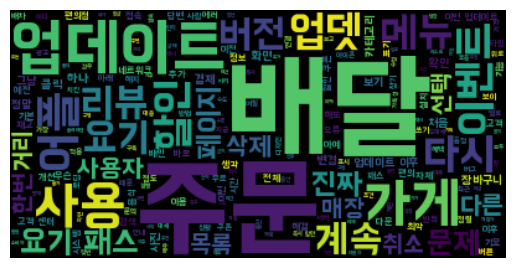

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Nouns = yogiyo1_df['Nouns'].tolist()
Nouns_str = ''
for lst in Nouns:
    for word in lst:
        Nouns_str += (word + ' ')
Nouns_str


wordcloud = WordCloud(font_path=fontpath).generate(Nouns_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

###형용사

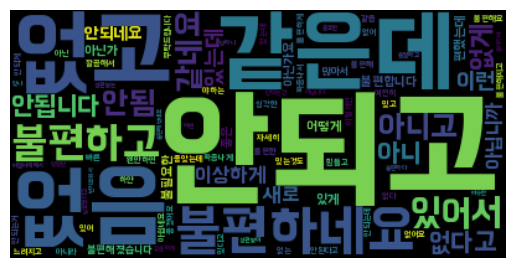

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Adjectives = yogiyo1_df['Adjectives'].tolist()
Adjectives_str = ''
for lst in Adjectives:
    for word in lst:
        Adjectives_str += (word + ' ')
Adjectives_str


wordcloud = WordCloud(font_path=fontpath).generate(Adjectives_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

##5점 리뷰

In [ ]:
yogiyo5_df = yogiyo_df[yogiyo_df['score'] == 5]

###명사

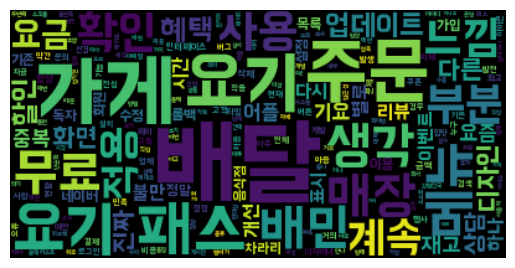

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Nouns = yogiyo5_df['Nouns'].tolist()
Nouns_str = ''
for lst in Nouns:
    for word in lst:
        Nouns_str += (word + ' ')
Nouns_str


wordcloud = WordCloud(font_path=fontpath).generate(Nouns_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

###형용사

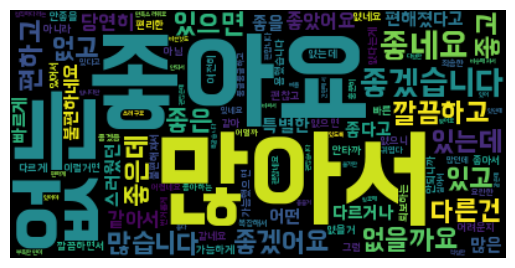

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Adjectives = yogiyo5_df['Adjectives'].tolist()
Adjectives_str = ''
for lst in Adjectives:
    for word in lst:
        Adjectives_str += (word + ' ')
Adjectives_str


wordcloud = WordCloud(font_path=fontpath).generate(Adjectives_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 눈금자 없애기
plt.show()

#**느낀점**


>배달의민족, 쿠팡이츠, 요기요 리뷰 분석을 해보니 불만 리뷰가 상당수로 많이 있다는 것을 알 수 있었습니다. 애플리케이션의 서비스에 만족하는 사람들은 리뷰를 작성하지 않는 것을 알 수 있었고 애플리케이션을 사용하다 불편한 점이 있으면 구글플레이스토어에 리뷰로 남기는 현상을 확인하였습니다. 이 중에서 쿠팡이츠의 리뷰가 상당수로 5점이 많았습니다. 저 또한 쿠팡이츠를 사용하면서 다른 애플리케이션보다 저렴한 점이 장점으로 다가왔는데 사용자들도 이처럼 생각한 것 같습니다.




